## Predictions on the dataset : ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data : training data(train and old test)

In [5]:
### since it's a regression problem so it means no smote is required and,
### since the train and test data is splited already so, no need for the train_test split from sklearn

In [2]:
df_train = pd.read_csv('clean_train.csv')
df_train

,Unnamed: 0,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,10678,3,3,3.0,0,0,1,1,9,4,2019,19,55,22,25,2,4107.0
10677,10679,3,3,3.0,0,0,0,1,27,4,2019,20,45,23,20,2,4145.0
10678,10680,2,2,3.0,0,1,0,1,27,4,2019,8,20,11,20,3,7229.0
10679,10681,2,2,3.0,0,0,1,1,1,3,2019,11,30,14,10,2,12648.0


In [3]:
df_train.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df_train

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,3,3,3.0,0,0,1,1,9,4,2019,19,55,22,25,2,4107.0
10677,3,3,3.0,0,0,0,1,27,4,2019,20,45,23,20,2,4145.0
10678,2,2,3.0,0,1,0,1,27,4,2019,8,20,11,20,3,7229.0
10679,2,2,3.0,0,0,1,1,1,3,2019,11,30,14,10,2,12648.0


In [5]:
X = df_train.drop('price', axis = 1)
y = df_train['price']

In [6]:
X.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4


In [7]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: price, dtype: float64

### train test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [10]:
print(f"{X_train.shape} : {y_train.shape} :: {X_test.shape} : {y_test.shape}")

(8010, 15) : (8010,) :: (2671, 15) : (2671,)


### loading the data : eval data(new test data)

In [11]:
X_eval = pd.read_csv('clean_test.csv')

In [12]:
X_eval.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
X_eval

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,6,2019,17,30,4,25,10
1,3,3,1.0,1,0,0,1,12,5,2019,6,20,10,20,4
2,4,4,1.0,0,1,0,0,21,5,2019,19,15,19,0,23
3,4,4,1.0,0,0,1,1,21,5,2019,8,0,21,0,13
4,2,2,3.0,0,0,1,1,24,6,2019,23,55,2,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,3,3,1.0,0,0,0,1,6,6,2019,20,30,20,25,23
2666,3,3,3.0,1,0,0,1,27,3,2019,14,20,16,55,2
2667,4,4,1.0,0,1,0,1,6,3,2019,21,50,4,25,6
2668,4,4,1.0,0,0,0,1,6,3,2019,4,0,19,15,15


In [14]:
### we cannot use the evluation mterices on this datasetif we using the test dataset from the already provided
### as there's no price provided in that one
### so I will make test data from train data for the evaluation purposes and then after,
### I will use the algorithms on the new test data (basically which is our test data)

### performance metrices : template

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [15]:
def eval_metrices(y_pred, y_test) : 
    print(r2_score(y_pred, y_test))
    print(mean_squared_error(y_pred, y_test))
    print(mean_absolute_error(y_pred, y_test))
    print(root_mean_squared_error(y_pred, y_test))

In [77]:
def plot_graphs(y_test, y_pred, title_suffix=""):
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linewidth=2, label='Perfect Prediction Line')
    plt.title(f'Actual vs Predicted Values {title_suffix}')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.legend()
    plt.grid(True)
   
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.title(f'Trend Comparison {title_suffix}')
    plt.xlabel('Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()


## Testing on old data

### Algorithm #1 : Linear regression

### => without hypertunning

In [39]:
### there's no hypertunning available in case of the linear regression

In [17]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [18]:
X_train['Total_Stops'].fillna(1, inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18416\232366832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Total_Stops'].fillna(1, inplace = True)


In [19]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_lr = linear_regression.predict(X_test)

In [23]:
eval_metrices(y_pred_lr, y_test)

0.07404816841504114
10291246.268509349
2081.1052103840816
3207.997236362486


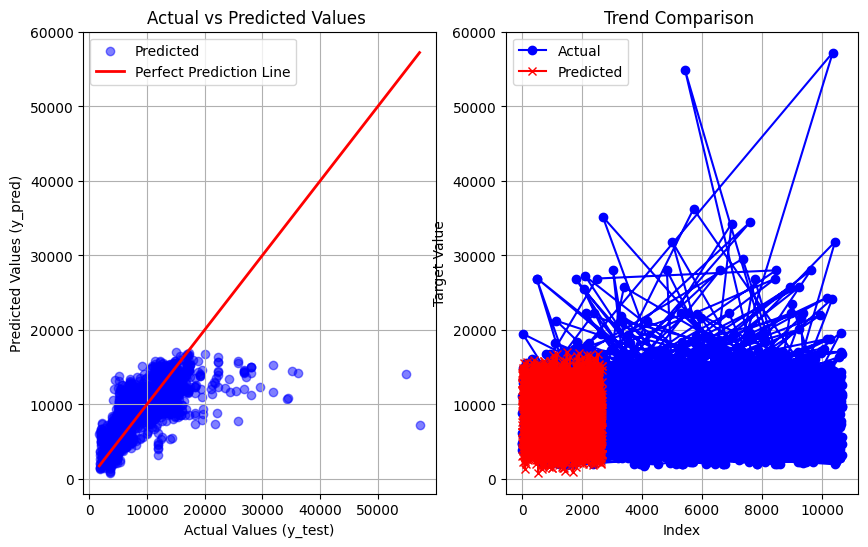

In [86]:
plot_graphs(y_test, y_pred_lr)

### Algorithm # 2 : SVM regressor

In [40]:
### now in general svm are already slow algorithms, but if we go the hypertunning, 
### the resources and time required will be very long

In [21]:
from sklearn.svm import SVR
svr = SVR()

In [22]:
svr.fit(X_train, y_train)

SVR()

In [23]:
y_pred_svr = svr.predict(X_test)

In [28]:
eval_metrices(y_pred_svr, y_test)

-384959382.9359258
22492360.669205155
3648.9522817089223
4742.611165719277


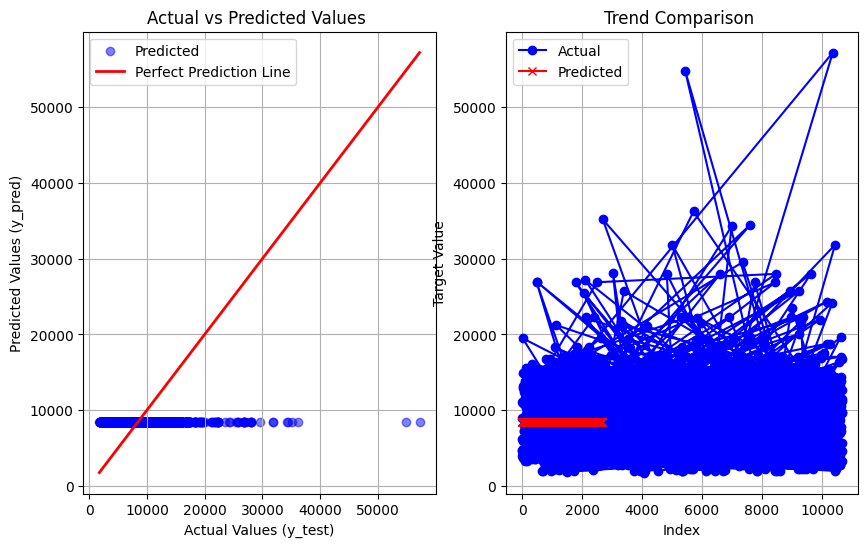

In [87]:
plot_graphs(y_test, y_pred_svr)

### Algorithm #3 : KNN

### without tunning

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [25]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
y_pred_knn = knn.predict(X_test)

In [33]:
eval_metrices(y_pred_knn, y_test)

0.3024309610279875
9296390.005915388
1855.2743541744667
3048.9981970993995


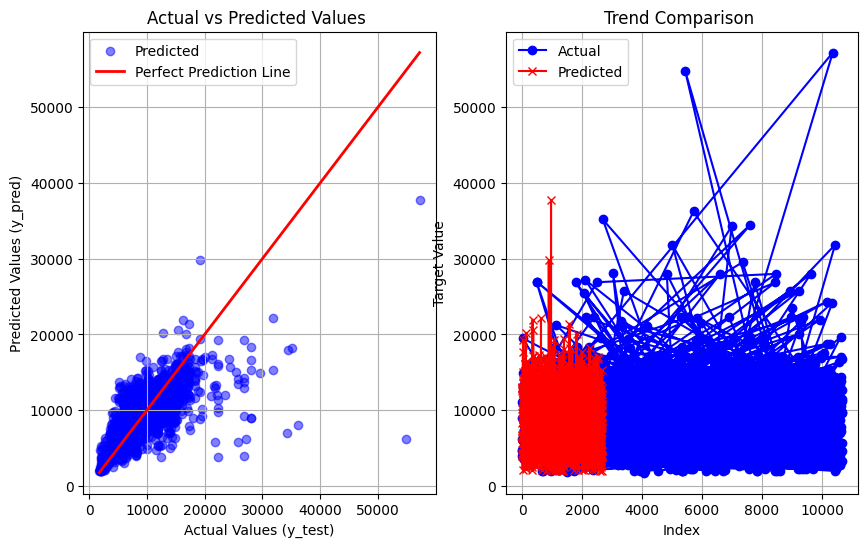

In [88]:
plot_graphs(y_test, y_pred_knn)

### with tunning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameter_knn = {
    'n_neighbors' : [3,4,5,6,7,8,9,10],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size' : [20,30,35,50,65]
}

In [29]:
knn_cv = GridSearchCV(knn, param_grid = parameter_knn, cv = 5, scoring = 'r2')
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
0.5724920378391726


In [30]:
y_pred_knn_cv = knn_cv.predict(X_test)

In [117]:
eval_metrices(y_pred_knn_cv, y_test)

0.361634207484813
8880710.311628217
1791.5204470886295
2980.0520652546015


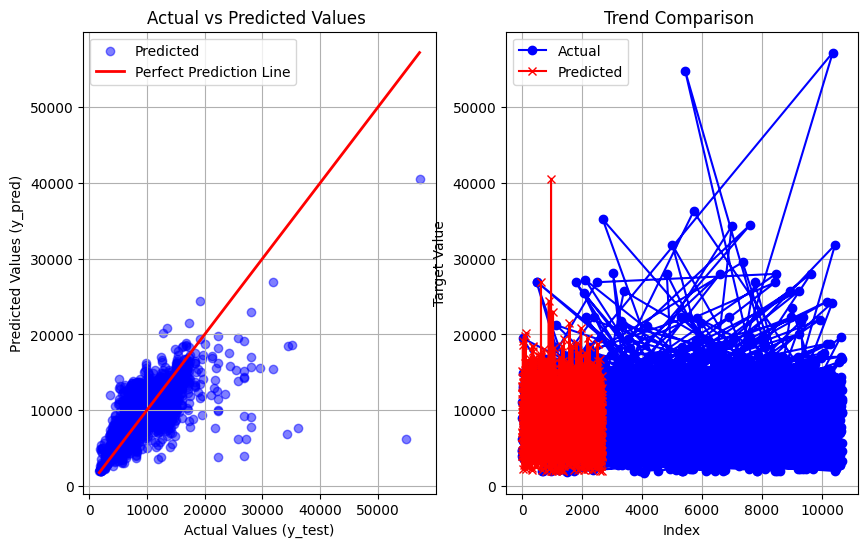

In [116]:
plot_graphs(y_test, y_pred_knn_cv)

### Algorithm #4 : Random forest regressor

In [59]:
### In this case as well I will also avoid hypertunning in general for the ensemble techniques 
### for the resources and also these algorithms perform the same in both cases

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [32]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred_rfr = rfr.predict(X_test)

In [44]:
eval_metrices(y_pred_rfr, y_test)

0.8407217255724877
3037696.667942037
706.5036291041938
1742.8989264848483


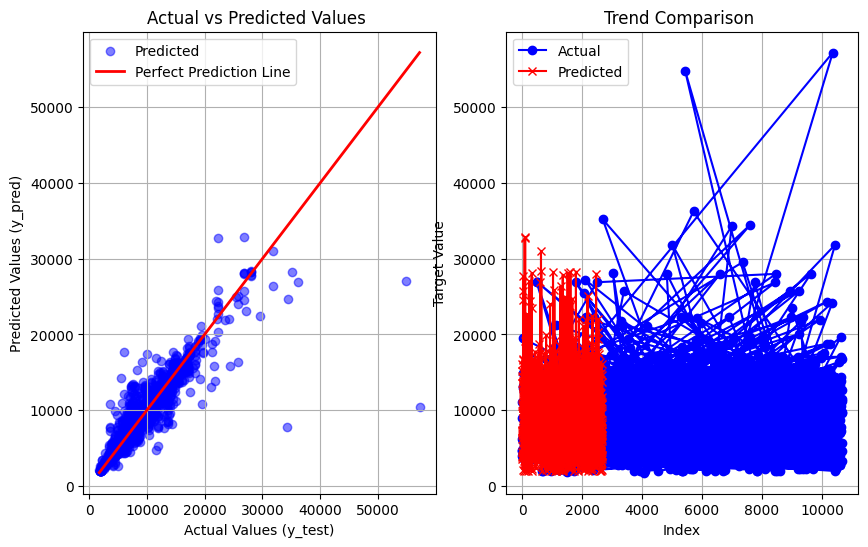

In [90]:
plot_graphs(y_test, y_pred_rfr)

### Algorithm #5 : Decision tree regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [35]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_pred_dtr = dtr.predict(X_test)

0.7942027554377472
4253199.711739258
791.4311743416948
2062.328710884678


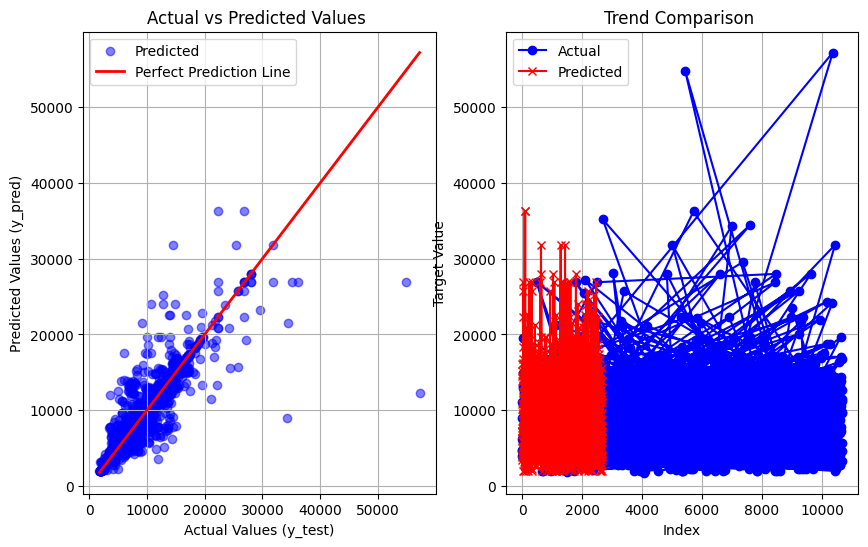

In [91]:
eval_metrices(y_pred_dtr, y_test)
plot_graphs(y_test, y_pred_dtr)

### Algorithm #6 : Adaboost regression

In [37]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)

AdaBoostRegressor()

In [38]:
y_pred_abr = abr.predict(X_test)

-0.15947971484615575
16628124.835725328
3022.889586930739
4077.7597815130466


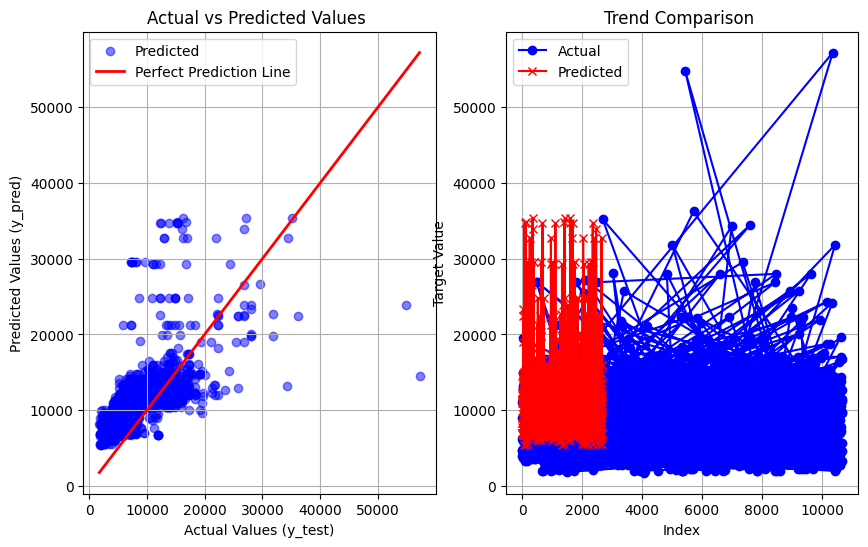

In [92]:
eval_metrices(y_pred_abr, y_test)
plot_graphs(y_test, y_pred_abr)

### Algorithm #7 : Gradient boost

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

0.6594282955616793
5082032.212877238
1345.7076093445403
2254.336313170073


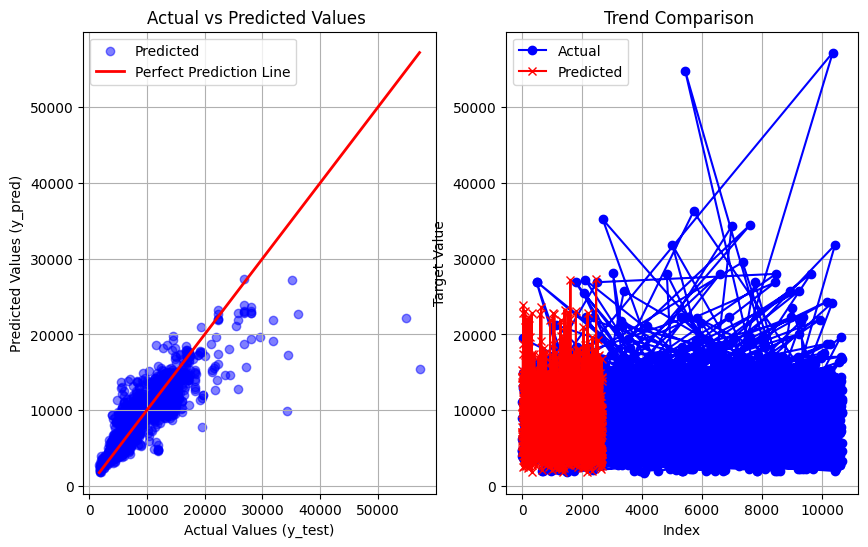

In [93]:
y_pred_gbr = gbr.predict(X_test)
eval_metrices(y_pred_gbr, y_test)
plot_graphs(y_test, y_pred_gbr)

## Predictions on the Eval dataset

In [55]:
### X_eval is basically where we don't have the price provided already
### from the results above it's clear that Random forest and decision Trees performed overall better
### so we will be taking into the account how much predictions differ from each other

### Decision Tree

In [94]:
y_pred_eval_dtr = dtr.predict(X_eval)
y_pred_eval_dtr

array([14714.,  4226., 12898., ..., 15764., 11050.,  7155.], shape=(2670,))

### Random forest regressor

In [95]:
y_pred_eval_rfr = rfr.predict(X_eval)
y_pred_eval_rfr

array([14714.  ,  4233.64, 12898.  , ..., 15693.65, 12931.45,  7555.31],
      shape=(2670,))

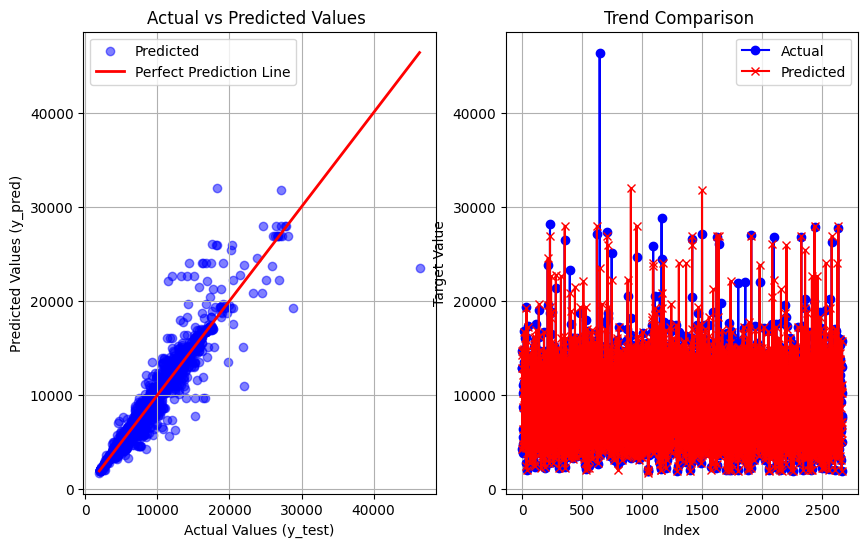

In [96]:
plot_graphs(y_pred_eval_rfr, y_pred_eval_dtr)

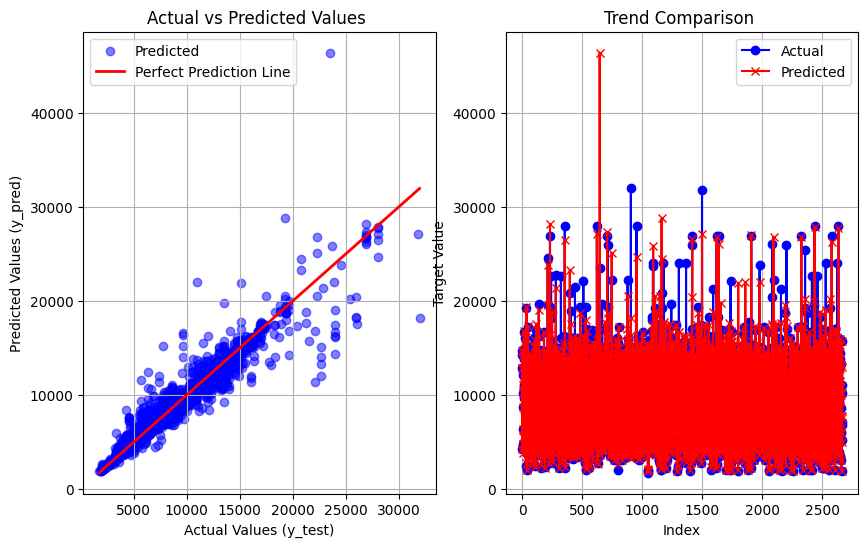

In [97]:
plot_graphs(y_pred_eval_dtr, y_pred_eval_rfr)

### combine plots function

In [110]:
def combine_graphs(y_pred) : 
    #---------vs decison tree predictions
    plot_graphs(y_pred_eval_dtr, y_pred)
    #---------vs Random forest predictions
    plot_graphs(y_pred_eval_rfr, y_pred)

### 1. Linear regression

In [45]:
y_pred_eval_lr = linear_regression.predict(X_eval)

In [46]:
y_pred_eval_lr

array([13811.37986298,  7368.88492251, 11320.57314811, ...,
       15033.56396761, 12663.04758512,  9655.78340657], shape=(2670,))

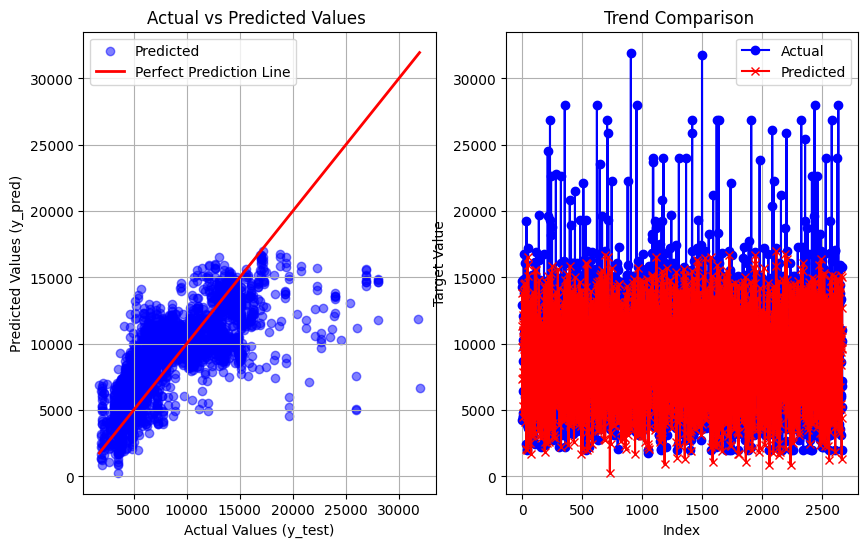

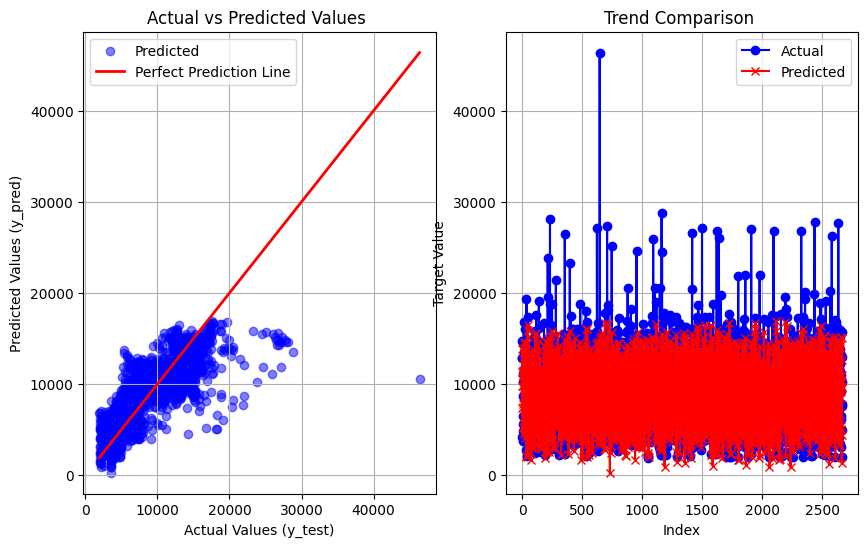

In [111]:
combine_graphs(y_pred_eval_lr)

### 2. SVM Regressor

In [57]:
y_pred_eval_svr = svr.predict(X_eval)

In [58]:
y_pred_eval_svr

array([8371.99700449, 8371.91810056, 8372.47672852, ..., 8371.82223542,
       8372.31643951, 8372.01685125], shape=(2670,))

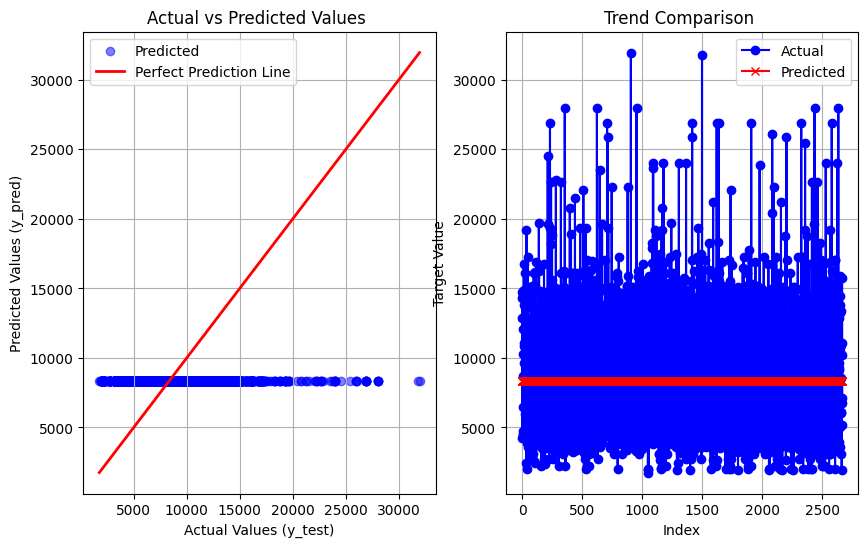

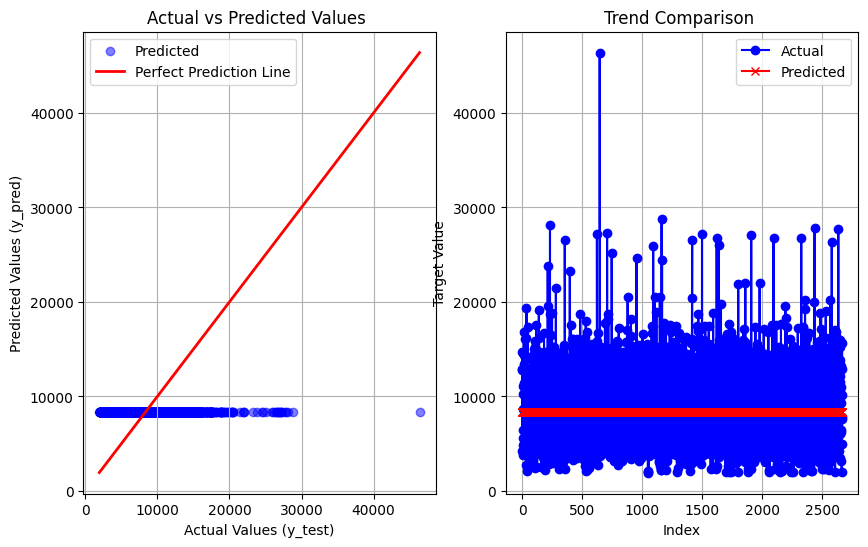

In [112]:
combine_graphs(y_pred_eval_svr)

### 3. KNN neighbors

In [61]:
y_pred_eval_knn = knn.predict(X_eval)

In [62]:
y_pred_eval_knn

array([11702.8,  4826.6, 13899.4, ..., 15617. , 11559.8,  8973.8],
      shape=(2670,))

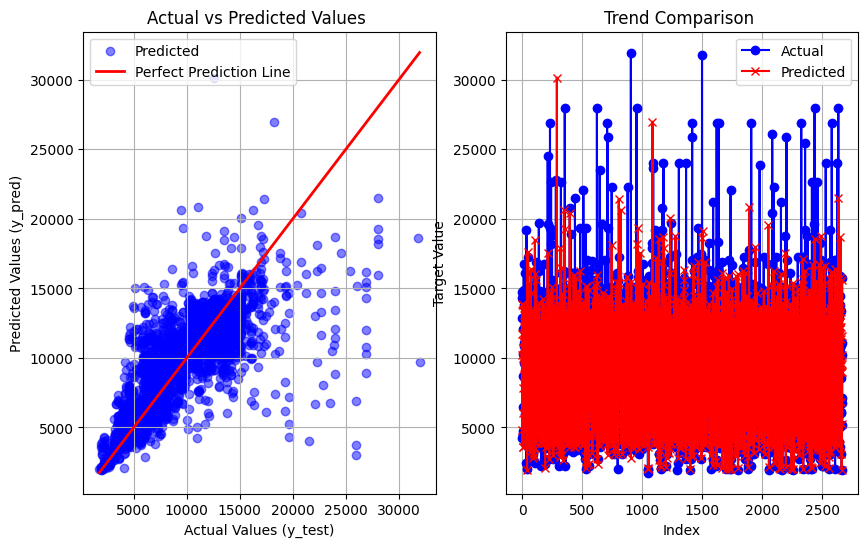

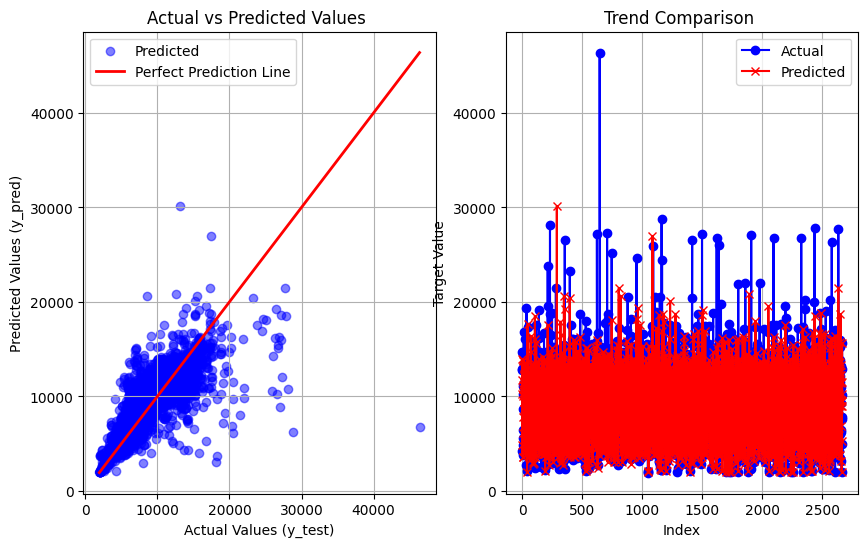

In [113]:
combine_graphs(y_pred_eval_knn)

### 4. Adaboost regressor

In [65]:
y_pred_eval_abr = abr.predict(X_eval)
y_pred_eval_abr

array([14078.19377163,  7660.37076649, 11480.39134547, ...,
       34937.1967921 , 12792.88611644, 11480.39134547], shape=(2670,))

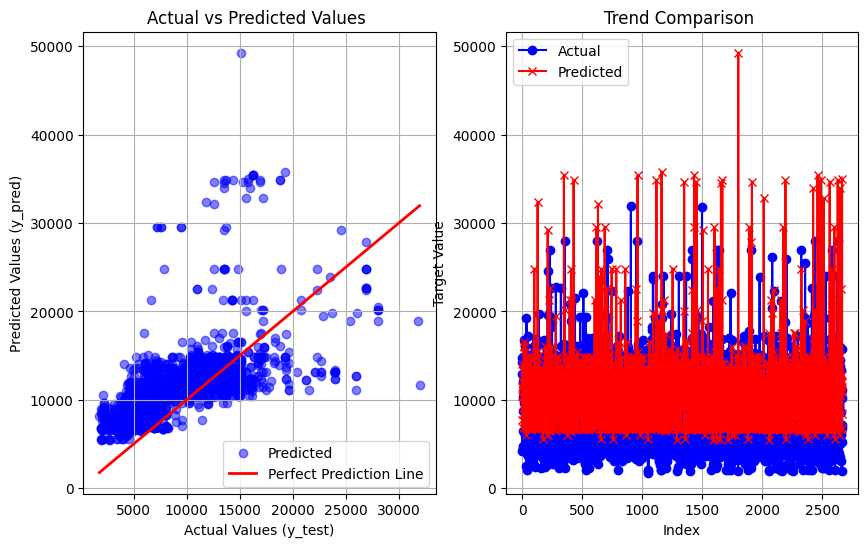

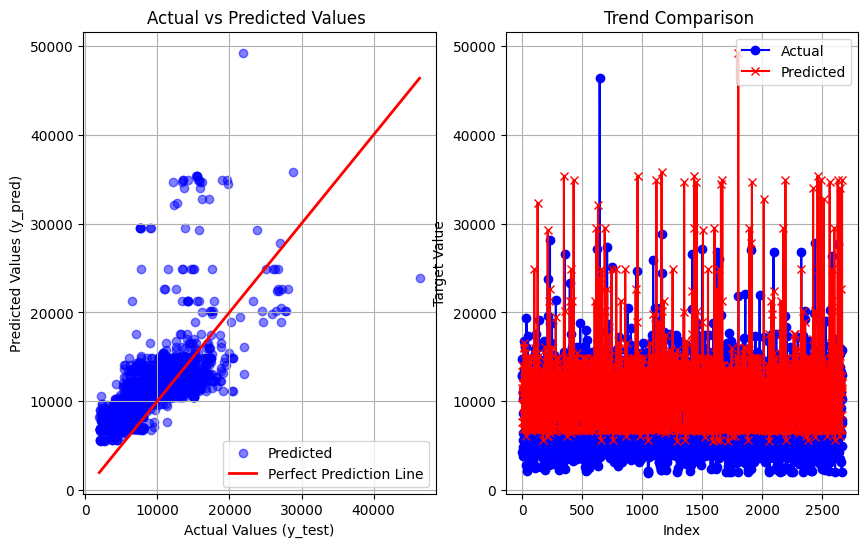

In [114]:
combine_graphs(y_pred_eval_abr)

### 5. Gradient boost regressor

In [69]:
y_pred_eval_gbr  = gbr.predict(X_eval)
y_pred_eval_gbr

array([14008.62357777,  4647.72393566, 11214.2455469 , ...,
       17844.3848323 , 13373.97606265,  9389.60828538], shape=(2670,))

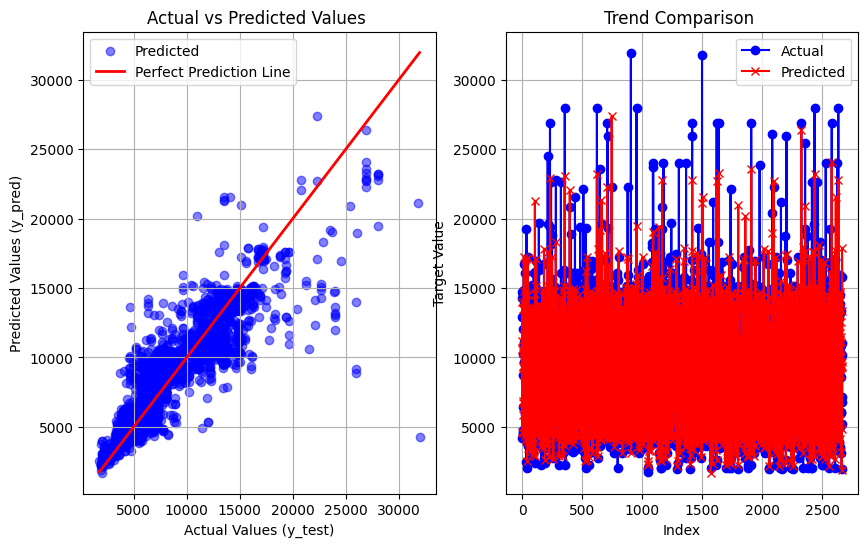

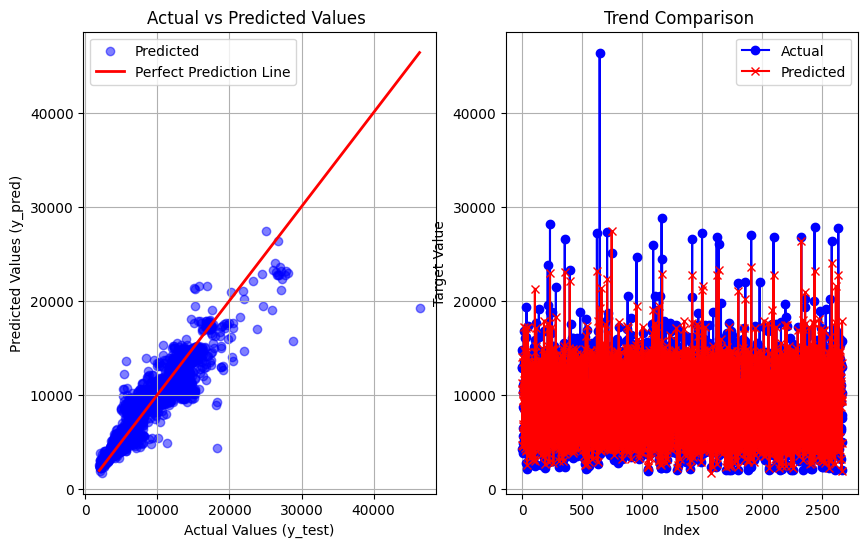

In [115]:
combine_graphs(y_pred_eval_gbr)